In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import FunctionTransformer,PolynomialFeatures,KBinsDiscretizer,OrdinalEncoder,LabelEncoder,OneHotEncoder

from sklearn.feature_extraction import DictVectorizer

from sklearn.impute import SimpleImputer, KNNImputer

In [ ]:
d = [{'foo':1,'bar':2},
     {'foo':3,'bar1':4}]
v= DictVectorizer(sparse=False)
x=v.fit_transform(d)
x

array([[2., 0., 1.],
       [0., 4., 3.]])

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [ ]:
cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df  =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",names =cols)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
df.columns.unique()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [ ]:
df.slope.value_counts()

1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64

In [ ]:
for i in df.columns.unique():
  #print(eval(i))
  print(i,":",df.loc[df[i]=='?',i].count())

#print(df.loc[df.thal=='?','thal'].count()

age : 0
sex : 0
cp : 0
trestbps : 0
chol : 0
fbs : 0
restecg : 0
thalach : 0
exang : 0
oldpeak : 0
slope : 0
ca : 0
thal : 0
num : 0


In [ ]:
df.replace('?',np.nan, inplace=True)
df.shape

(303, 14)

In [ ]:
si = SimpleImputer(missing_values=np.nan,strategy='mean')
df = si.fit_transform(df)
df.shape

(303, 14)

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dd1fa6f10>,
      dtype=object)

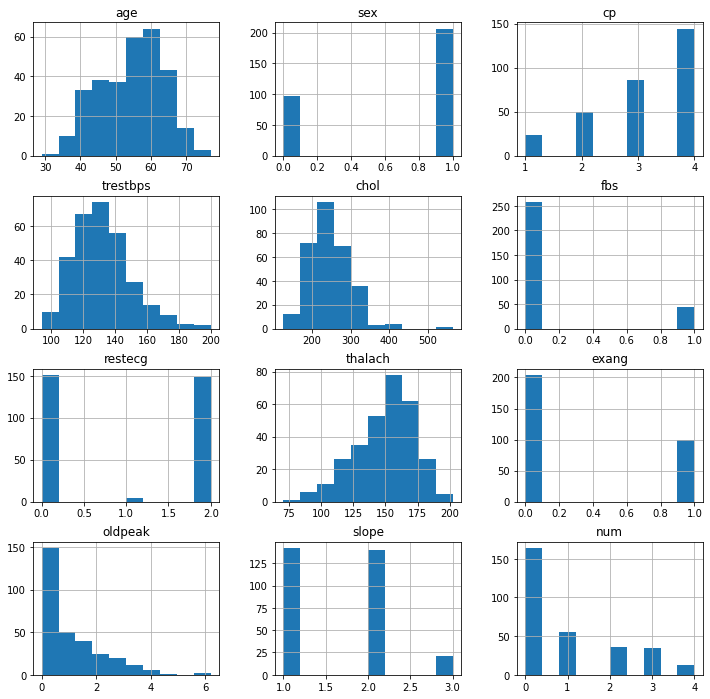

In [ ]:
df.hist(figsize=(12,12))

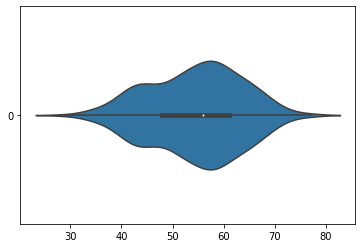

In [ ]:
import seaborn as sns

#sns.violinplot(data = df.chol,orient='h', width=1,gridsize=500)
sns.violinplot(data = df.age,orient='h', width=.5,gridsize=100)


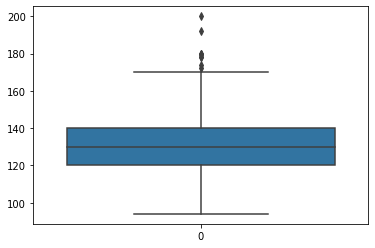

In [ ]:
sns.boxplot(data=df.trestbps)

In [ ]:
mas =MaxAbsScaler()
df= mas.fit_transform(df)

In [ ]:
from sklearn.datasets import load_wine

x,y = load_wine(return_X_y=True, as_frame=True)

In [ ]:
print(x.shape)
print(y.shape)

(178, 13)
(178,)


In [ ]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dcf945c50>,
      dtype=object)

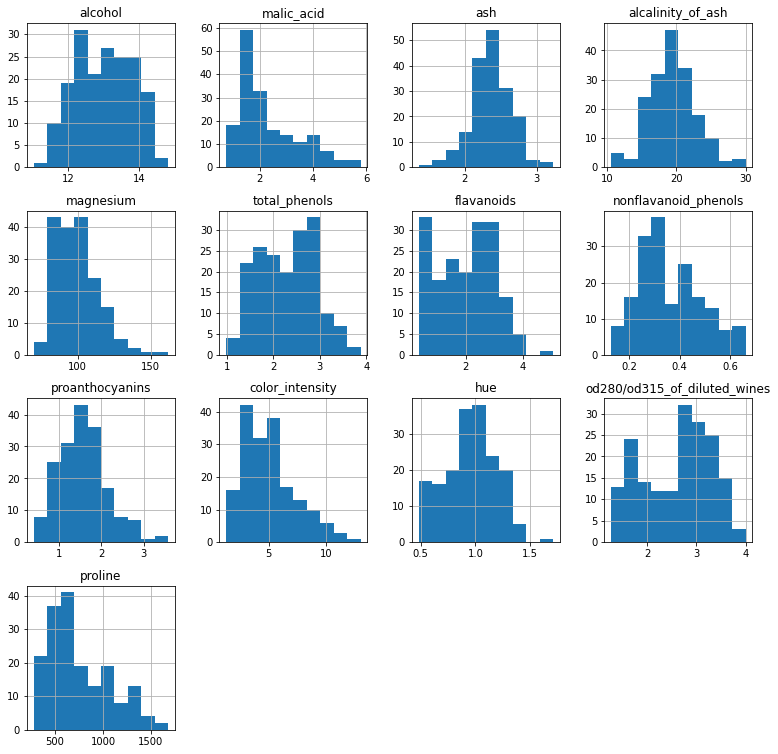

In [ ]:
x.hist(figsize=(13,13))

In [ ]:
trans = FunctionTransformer(np.log1p,validate=True)
xtrans = trans.fit_transform(x)
print(xtrans[:5])
xtrans =pd.DataFrame(xtrans,columns=x.columns)

[[2.72326717 0.99694863 1.23256026 2.8094027  4.85203026 1.33500107
  1.40118297 0.24686008 1.19088756 1.89311196 0.71294981 1.59330853
  6.9716686 ]
 [2.65324196 1.02245093 1.1442228  2.50143595 4.61512052 1.29472717
  1.32441896 0.23111172 0.82417544 1.68268837 0.71783979 1.48160454
  6.95749737]
 [2.65042109 1.21194097 1.30019166 2.97552957 4.62497281 1.33500107
  1.44456327 0.26236426 1.33762919 1.89911799 0.70803579 1.42791604
  7.07834158]
 [2.73241756 1.08180517 1.25276297 2.87919846 4.73619845 1.5789787
  1.5018527  0.21511138 1.1568812  2.17475172 0.62057649 1.4929041
  7.30047281]
 [2.65605491 1.2781522  1.35325451 3.09104245 4.77912349 1.33500107
  1.30562646 0.32930375 1.03673688 1.6714733  0.71294981 1.36863943
  6.60123012]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dcf249950>,
      dtype=object)

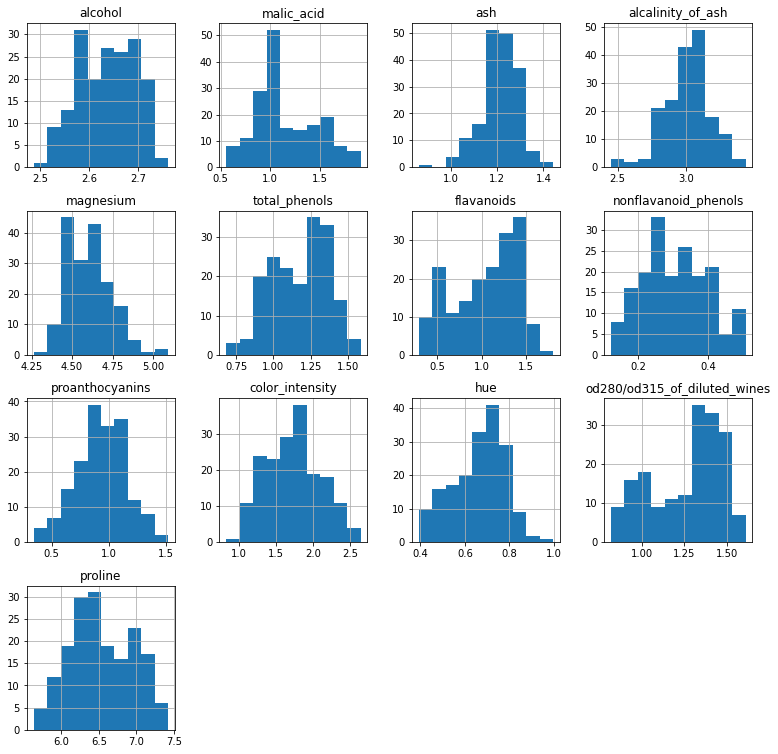

In [ ]:
xtrans.hist(figsize=(13,13))

In [ ]:
print(x.shape)
poly = PolynomialFeatures(degree=2)
polyx= poly.fit_transform(x)
polyx.shape

(178, 13)


(178, 105)

In [ ]:
polyx[:5]
poly.get_feature_names_out()

In [ ]:
kbd = KBinsDiscretizer()
xkb = kbd.fit_transform(x)
xkb.toarray()[:5]

In [ ]:
iriscol=['sepal length','sepal width','petal length','petal width','label']
from sklearn.datasets import load_iris

x,y = load_iris(return_X_y=True, as_frame=True)
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
y.unique()
ohe = OneHotEncoder()
print(y.shape)
yohe = ohe.fit_transform(y.values.reshape(-1,1))
print(yohe.shape)
yohe.toarray()[:5]

(150,)
(150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
l = LabelEncoder()
print(y.shape)
print(y[:5])
ylbl = l.fit_transform(y)
print(ylbl.shape)
ylbl[:5]



(150,)
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
(150,)


array([0, 0, 0, 0, 0])

In [ ]:
iriscol=['sepal length','sepal width','petal length','petal width','label']
dfiris= pd.read_csv("iris.data",names=iriscol)
dfiris.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:

y=dfiris.pop('label')
x=dfiris
print(x)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: label, Length: 150, dtype: object

In [ ]:
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
pca.fit(x)
print(pca.explained_variance_,pca.mean_)

[4.22484077 0.24224357 0.07852391] [5.84333333 3.054      3.75866667 1.19866667]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
print(x[:5])
est = [('imp',SimpleImputer()),
       ('scale',StandardScaler()),
       ('reg',LinearRegression())
       ]
pipe = Pipeline(steps =est)
x=pipe.fit(x)
print(x[:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


ValueError: ignored

In [ ]:
pipe.steps[1]

('scale', StandardScaler())

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.datasets import fetch_openml

x,y = fetch_openml('mnist_784',version=1, return_X_y=True)
type(x)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(49000, 784) (21000, 784) (49000,) (21000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
pipe1= Pipeline([('scale',MinMaxScaler()),
                 ('est',LogisticRegression(random_state=42,
                                          solver='lbfgs',
                                          C=1))])
pipe1.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('scale', MinMaxScaler()),
                ('est', LogisticRegression(C=1, random_state=42))])

In [ ]:
print(pipe1.score(xtest,ytest))
pipe1.score(xtrain,ytrain)

0.9218095238095239


0.937204081632653

In [ ]:
from sklearn.model_selection import GridSearchCV
logreg=LogisticRegression(C=1.0,random_state=1729)
gridc=[0,1e-4,1e-3,1e-2,1e-1,1.0,10.0,100.0]
pgrid = {'C':gridc}
pipe2=Pipeline([('reg',logreg)])
gcv = GridSearchCV(pipe2,pgrid,scoring='f1')
gcv.fit(xtrain,ytrain)

print(gcv.best_params_, gcv.bes_score_)

In [ ]:
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
def warn(*args,**kwargs):
  pass
import warnings
warnings.warn=warn

In [ ]:
gridCs=[0,1e-4,1e-3,1e-2,1e-1,1.0,10.0,100.0]
scaler=MinMaxScaler()
logreg=LogisticRegression(C=1.0,random_state=1729)
pipe=Pipeline([('scale',scaler),
               ('log',logreg)])
print(logreg.get_params().keys())
pipelogitCV=GridSearchCV(pipe,
                         param_grid={'log__C':gridCs},
                         scoring='f1')
pipelogitCV.fit(xtrain,ytrain)